In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

In [2]:
### import some analysis functions we wrote for this project
import sys ; sys.path.append("../") 
from ppe_analysis.analysis import *

In [5]:
# annual mean
def amean(da,cf=1/365):
    #annual mean
    m  = da['time.daysinmonth']
    xa = cf*(m*da).groupby('time.year').sum().compute()
    xa.name=da.name
    return xa

In [7]:
# global PFT mean
def pmean(da,la):
    xp=(1/la.groupby('pft').sum()*(da*la).groupby('pft').sum()).compute()
    return xp

In [3]:
# CLM-PPE
dvs=['TLAI'] 
htape='h1' # Evan, here is where you select h1=PFT level output (h0 is gridcell level)
yr0=2003
yr1=2014
ds=get_exp('transient',dvs=dvs,tape=htape,yy=(yr0,yr1))

In [20]:
t=slice(str(yr0),str(yr1))
da=ds.TLAI.sel(time=t)
la=xr.open_dataset('landarea_transient.nc').landarea_pft.sel(time=t)
amean_lai=amean(da).mean(dim='year').compute()
PPE_lai = pmean(amean_lai,la).mean(dim='time').compute()

In [9]:
#get the pft names
pfts=xr.open_dataset('/glade/campaign/asp/djk2120/PPEn11/paramfiles/OAAT0000.nc').pftname
pfts=[str(p)[2:-1].strip() for p in pfts.values][0:17]

In [10]:
# load parameter sets 
lhckey = '/glade/campaign/asp/djk2120/PPEn11/csvs/lhc220926.txt'
df = pd.read_csv(lhckey)
lhc_params = df.drop(columns='member')
num_params = len(lhc_params.columns)

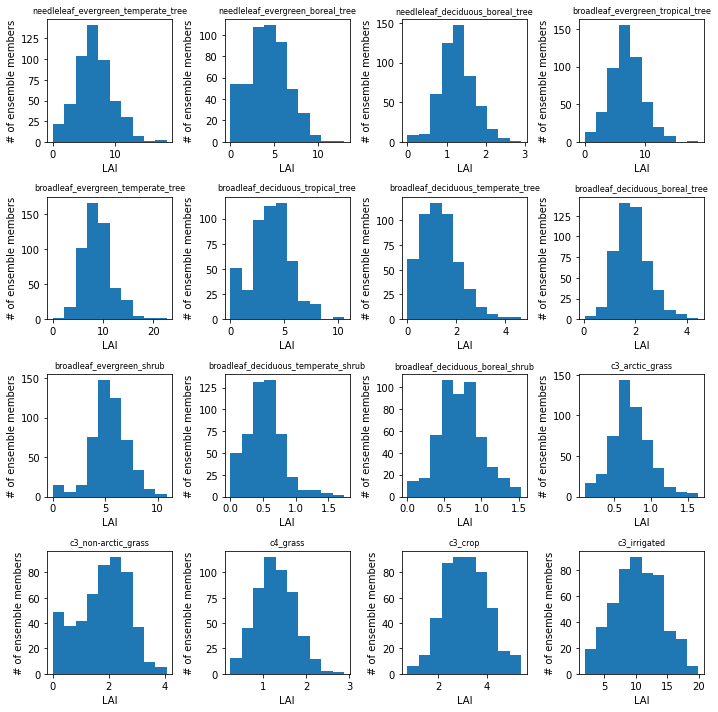

In [21]:
# global mean of Annual Mean LAI by PFT
plt.figure(figsize=[10,10])

for p in range(1,17):
    plt.subplot(4,4,p)
    plt.hist(PPE_lai.isel(pft=p).values)
    plt.xlabel('LAI')
    plt.ylabel('# of ensemble members')
    plt.title(pfts[p],fontsize=8)

plt.tight_layout()